In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [3]:
tickers = ['SBIN.NS', 'HDFCBANK.NS', 'RELIANCE.NS', 'ITC.NS', 'TCS.NS', 'INFY.NS', 'ICICIBANK.NS']

start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [4]:
data.head()

Attributes   Adj Close                                                     \
Symbols        SBIN.NS  HDFCBANK.NS  RELIANCE.NS      ITC.NS       TCS.NS   
Date                                                                        
2020-01-01  326.298187  1258.458008  1480.595825  205.544617  2075.235107   
2020-01-02  331.029938  1266.479614  1505.802002  207.055328  2065.709229   
2020-01-03  325.566467  1248.418701  1507.616455  205.889923  2106.876221   
2020-01-06  311.224731  1221.401001  1472.651367  202.954803  2106.685791   
2020-01-07  310.639374  1240.741455  1495.307617  203.170609  2111.855225   

Attributes                                Close                            \
Symbols        INFY.NS ICICIBANK.NS     SBIN.NS  HDFCBANK.NS  RELIANCE.NS   
Date                                                                        
2020-01-01  690.363403   531.990540  334.450012  1278.599976  1495.424927   
2020-01-02  688.348999   535.806335  339.299988  1286.750000  1520.883545   
2020-01-03  698.936035   534.071838  333.700012  1268.400024  1522.716187   
2020-01-06  692.237183   521.038513  319.000000  1240.949951  1487.400879   
2020-01-07  681.977905   518.263306  318.399994  1260.599976  1510.284058   

Attributes  ...         Open                               Volume              \
Symbols     ...       TCS.NS     INFY.NS ICICIBANK.NS     SBIN.NS HDFCBANK.NS   
Date        ...                                                                 
2020-01-01  ...  2168.000000  735.000000   539.900024  17379320.0   1836849.0   
2020-01-02  ...  2179.949951  738.900024   536.000000  20324236.0   3068583.0   
2020-01-03  ...  2164.000000  733.900024   538.000000  21853208.0   5427775.0   
2020-01-06  ...  2205.000000  746.099976   537.250000  35645325.0   5445093.0   
2020-01-07  ...  2200.500000  738.000000   531.299988  50966826.0   7362247.0   

Attributes                                                            
Symbols    RELIANCE.NS     ITC.NS     TCS.NS    INFY.NS ICICIBANK.NS  
Date                                                                  
2020-01-01   6463060.0  4208837.0  1354908.0  2112415.0    7642793.0  
2020-01-02   8173308.0  8402979.0  2380752.0  5658200.0   10264223.0  
2020-01-03   9684434.0  9284478.0  4655761.0  7882938.0    9594690.0  
2020-01-06  11315596.0  7636617.0  3023209.0  6519403.0   12534334.0  
2020-01-07   7699489.0  8416741.0  2429317.0  7899363.0   16101835.0  

[5 rows x 42 columns]

In [5]:
data = data['Adj Close']

In [10]:
portfolio = np.random.random(len(tickers))
portfolio /= np.sum(portfolio)

In [30]:
return_simple = np.sum(np.log(data/data.shift())*weights, axis=1)
return_simple

Date
2020-01-01    0.000000
2020-01-02    0.007025
2020-01-03   -0.000515
2020-01-06   -0.018017
2020-01-07    0.005394
                ...   
2022-11-16    0.001412
2022-11-17   -0.001842
2022-11-18   -0.001616
2022-11-21   -0.012605
2022-11-22    0.005253
Length: 719, dtype: float64

<IPython.core.display.Javascript object>


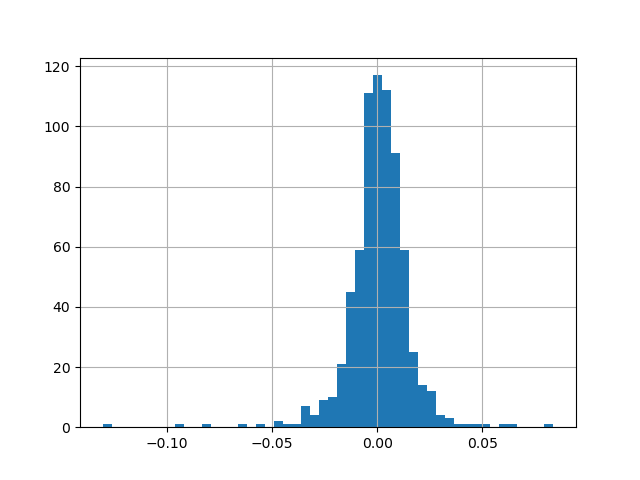

<AxesSubplot:>

In [31]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
return_simple.hist(bins=50, ax=ax)

In [12]:
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [14]:
log_return

Date
2020-01-01    0.000000
2020-01-02    0.007794
2020-01-03   -0.003634
2020-01-06   -0.021099
2020-01-07    0.005827
                ...   
2022-11-16    0.002646
2022-11-17   -0.002734
2022-11-18   -0.000593
2022-11-21   -0.010823
2022-11-22    0.003381
Length: 719, dtype: float64

In [23]:
np.sum(log_return)

0.4816147707757922

In [25]:
actual_return = np.exp(np.sum(log_return))
actual_return

1.618686099988201

<IPython.core.display.Javascript object>


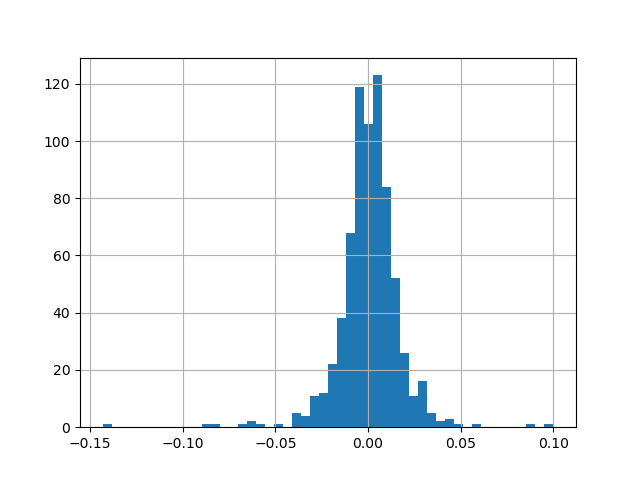

<AxesSubplot:>

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [28]:
log10_return = np.sum(np.log10(data/data.shift())*portfolio, axis=1)
log10_return

Date
2020-01-01    0.000000
2020-01-02    0.003385
2020-01-03   -0.001578
2020-01-06   -0.009163
2020-01-07    0.002531
                ...   
2022-11-16    0.001149
2022-11-17   -0.001188
2022-11-18   -0.000258
2022-11-21   -0.004700
2022-11-22    0.001468
Length: 719, dtype: float64

<IPython.core.display.Javascript object>


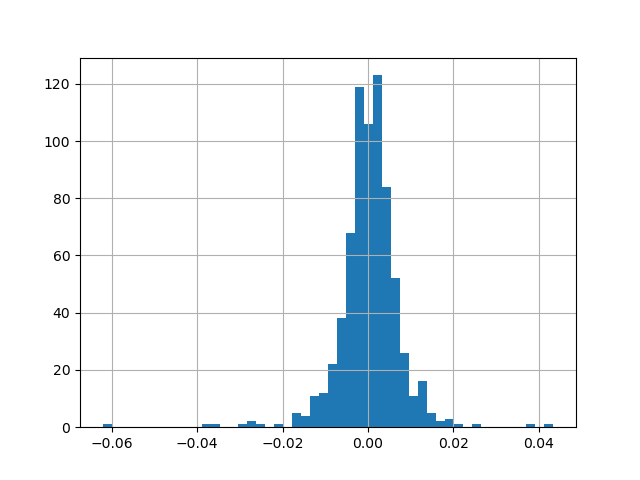

<AxesSubplot:>

In [29]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
log10_return.hist(bins=50, ax=ax)

In [33]:
actual_return10 = 10 ** (np.sum(log10_return))
actual_return10

1.6186860999882013

In [16]:
log_return.std()

0.01658136595412318

In [17]:
log_return.mean()

0.0006698397368230774

In [20]:
sharpe_ratio = log_return.mean()/log_return.std()
sharpe_ratio

0.04039713849126601

In [22]:
asr = sharpe_ratio*252**.5
asr

0.6412846927591493